In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='darkgrid')
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('/content/sample_data/heart.csv', sep=",", encoding='latin1')

Leemos nuestro dataset importado desde el comando pd.read_excel y le indicamos la hoja si en caso tuviera más de una.

# **EXPLORACIÓN DE DATA**

In [ ]:
df.shape

(1025, 14)

El comando shape nos indica que el dataset que se está analizando tiene 1025 filas y 14 columnas.

In [ ]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Podemos ver que el comando head nos permite visualizar un poco sobre el dataset como las columnas indicadas y limitándolo a mostrarnos 5 registros.

In [ ]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


Visualizamos que no existen valores nulos en ningún campo.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Podemos visualizar el tipo de dato de cada columna y la cantidad de registros que tienen.

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Analizando las variables numericas. Vemos que los valores son normales y no exite una data desbalanceada en la variable target.

# **Variable objetivo (Target)**

In [ ]:
df['target'].value_counts(normalize=False).to_frame('Cantidad').join(
    df['target'].value_counts(normalize=True).mul(100).round(2).to_frame('Proporción (%)')
)

,Cantidad,Proporción (%)
target,,
1,526,51.32
0,499,48.68


La variable target tiene 2 valores: 0 que indica la menor probabilidad de ataque cardiáco y 1 la que tiene mayor probabilidad. Aqui podemos observar tanto la cantidad, la distribución. Esto quiere decir que existen muchos pacientes con una alta probabilidad de sufrir algun ataque, lo cual nos sirve mucho para el análisis predictivo.

<ipython-input-10-efb59231cd29>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='target', data=df, kind="count", palette=["#3498db", "#e74c3c"])


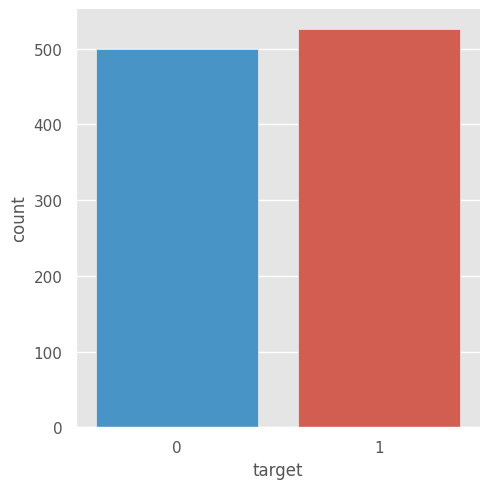

In [ ]:
sns.catplot(x='target', data=df, kind="count", palette=["#3498db", "#e74c3c"])

De una forma más gráfica podemos visualizar la variable target con una distribución pareja lo cual no ayudará mucho al momento de clasificar.

# **VARIABLES CUANTITATIVAS**

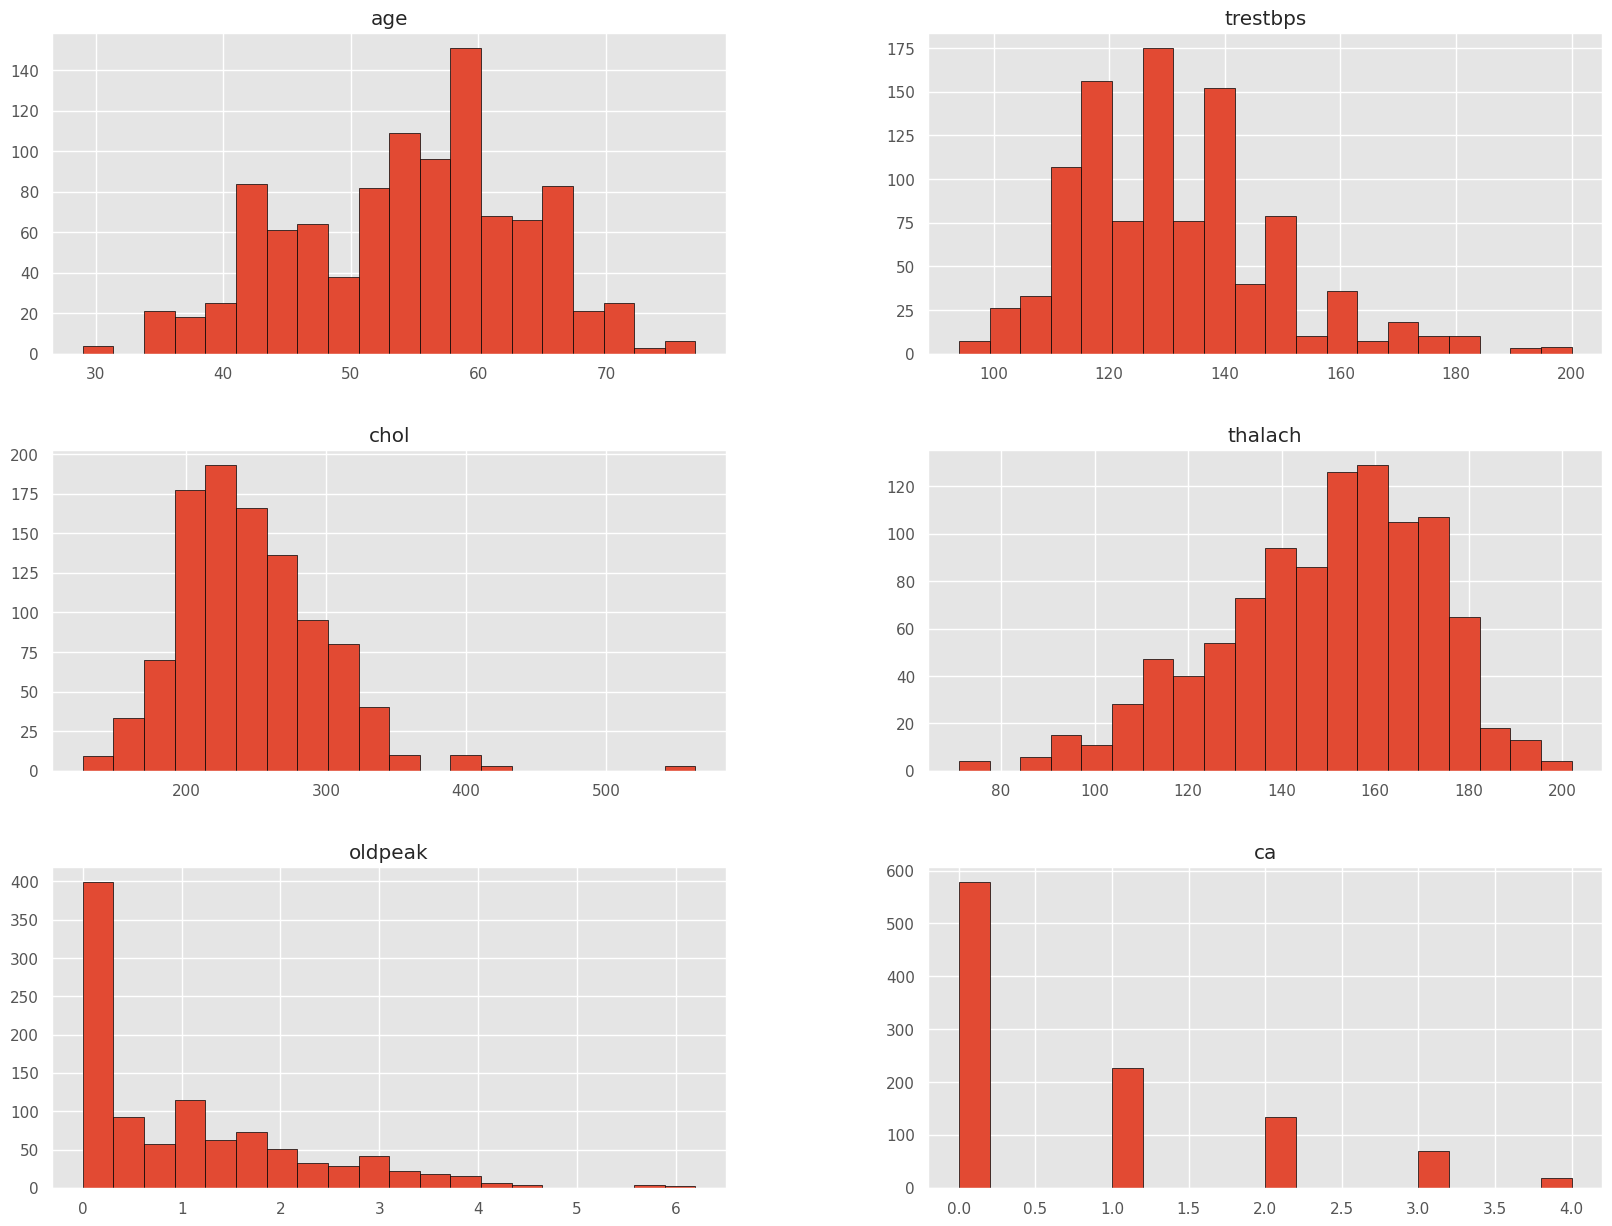

In [ ]:
Var=['age','trestbps','chol','thalach','oldpeak','ca']
df[Var].hist(bins=20 ,figsize=(20,15), edgecolor='black')
plt.show()

Podemos observar que en la variable edad, se concentra entre los 50-60 años de edad. Según la gráfica, las variables: trestbps, chol, thalach, oldpeak, ca pueden presentar variables atípicas (outliers) ya que tienen muchos picos altos.

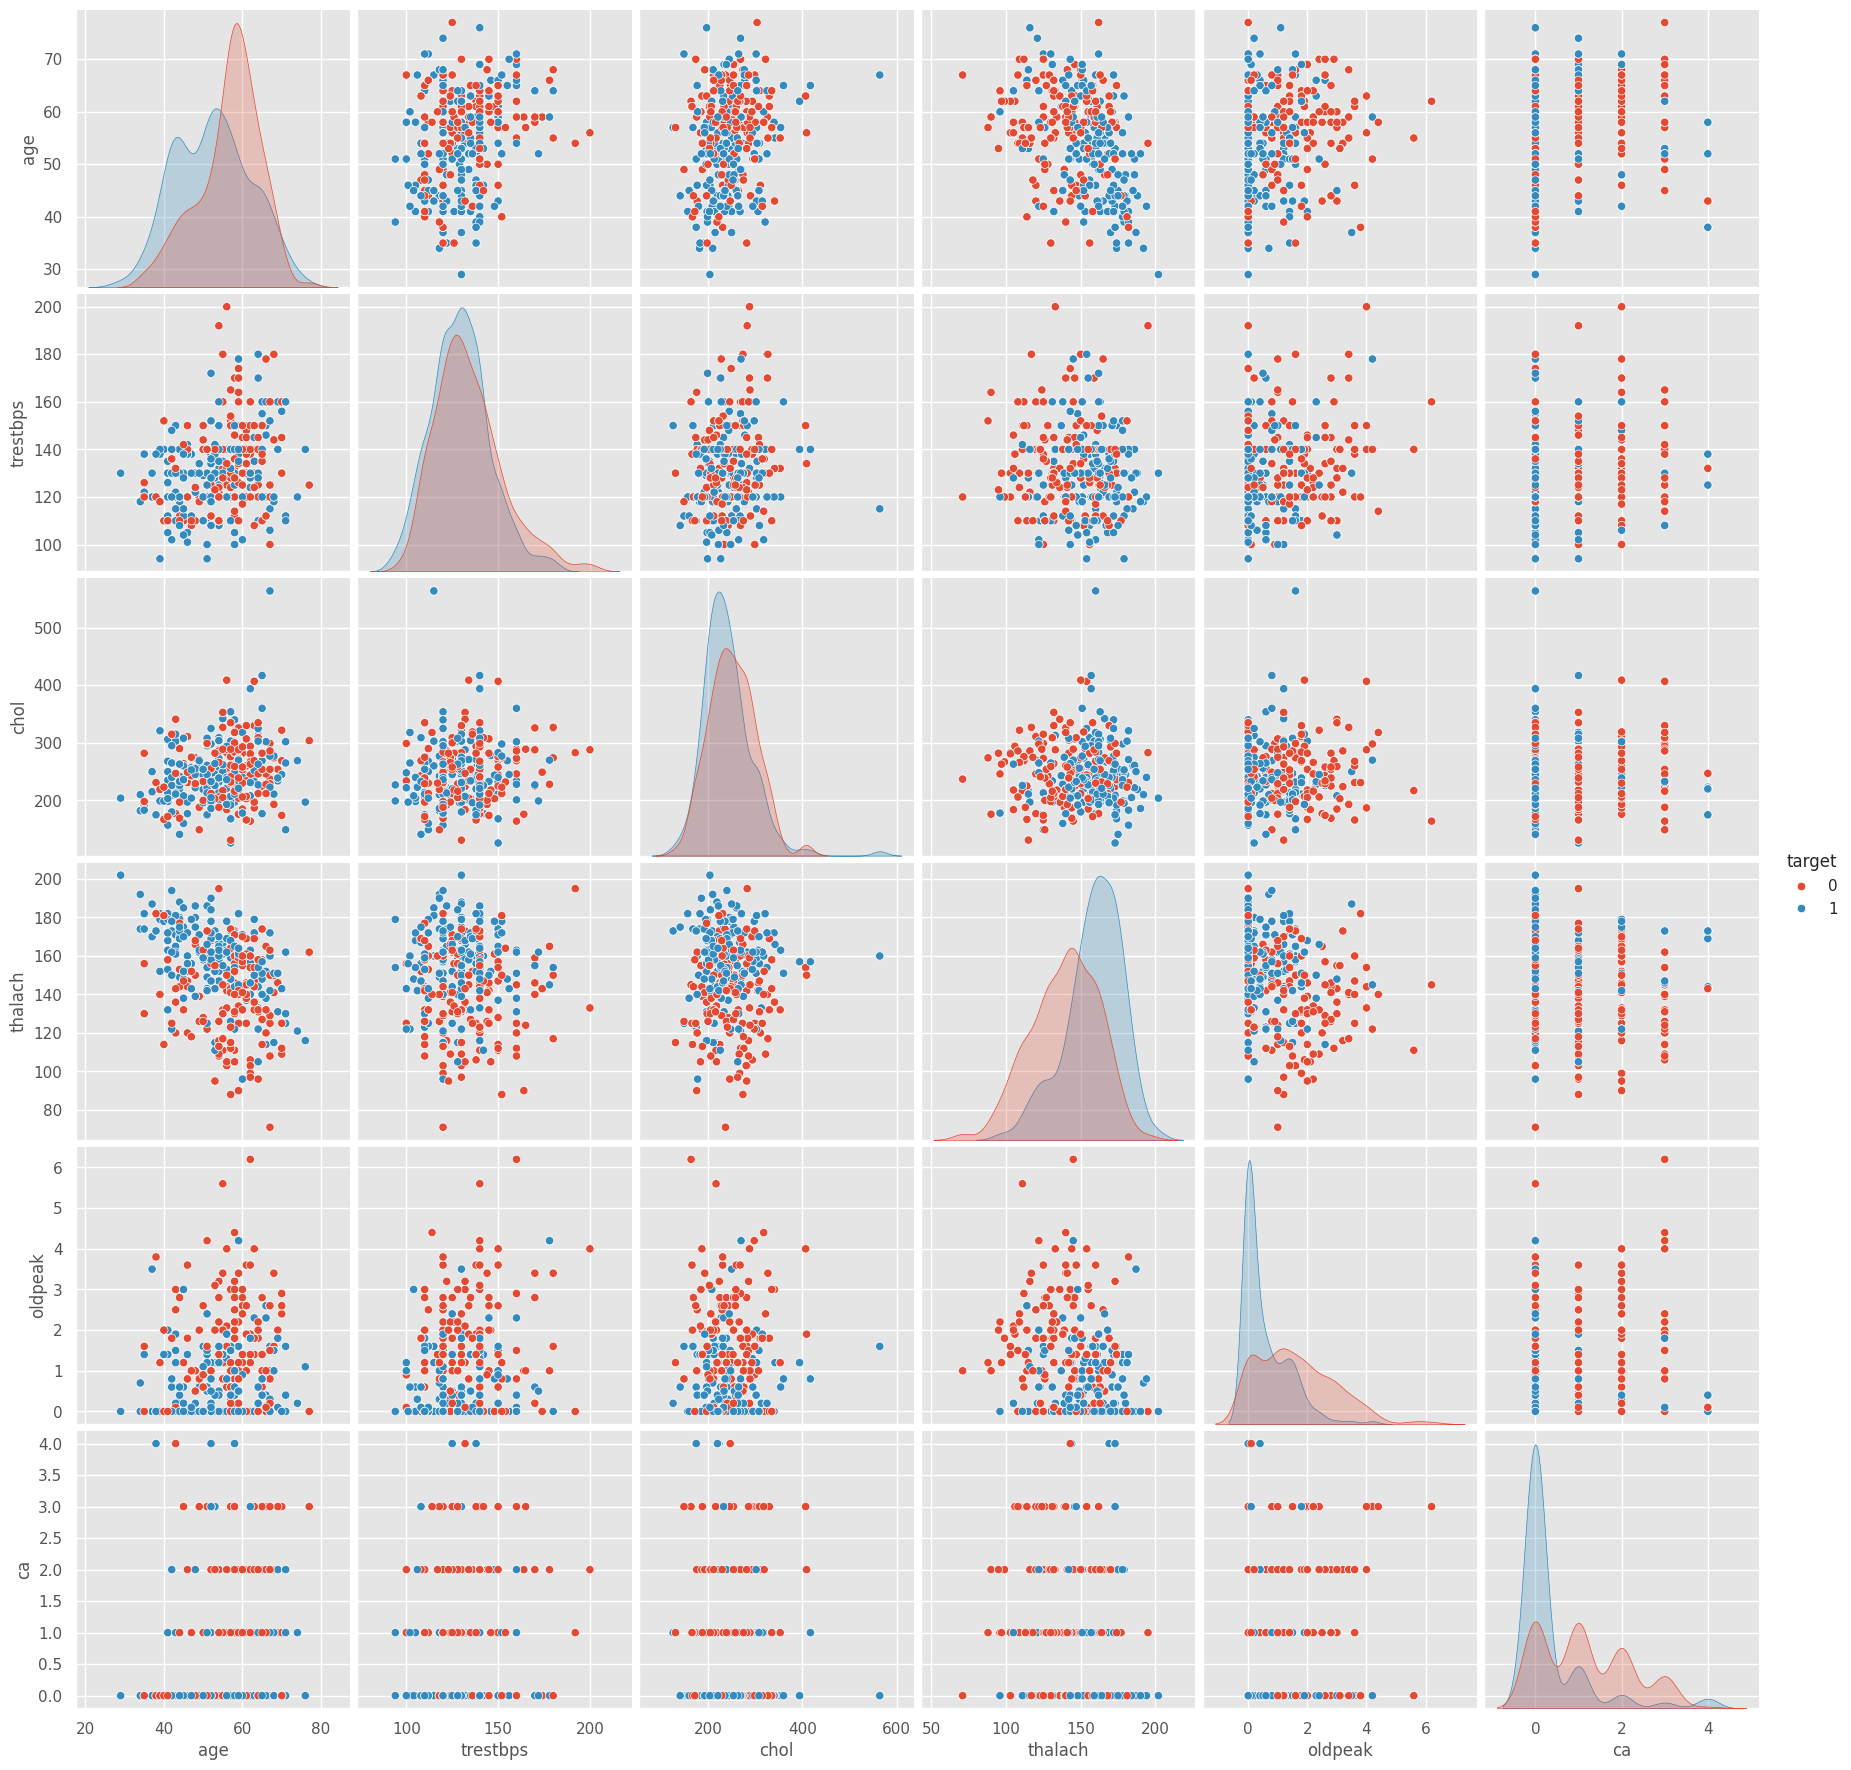

In [ ]:
var = ['age','trestbps','chol','thalach','oldpeak','ca', 'target']
sns.pairplot(df[variables], hue='target', height=3, diag_kind='kde')

Hay una cierta tendencia donde los pacientes entre 40 - 60 años tienden a padecer de ataques cardiácos. Lo mismo pasa con la variable thalach donde se concentra la mayor cantidad de ataques cardiácos.

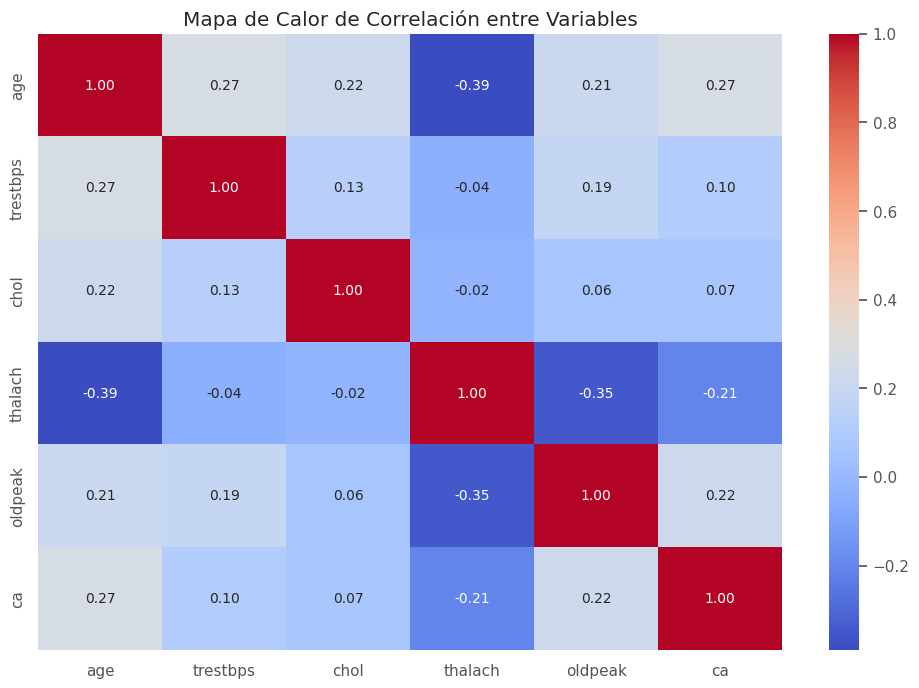

In [ ]:
corr = df[['age','trestbps','chol','thalach','oldpeak','ca']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor de Correlación entre Variables Cuantitativas")
plt.show()

Se visualiza que la variabla thalach tiene una relación negativa con la variable age, quiere decir que a mayor edad se reduce la thalach (frecuencia cardiáca). Las otras variables tienen valores bajos de correlación lo que quiere decir que no estan directamente relacionadas.

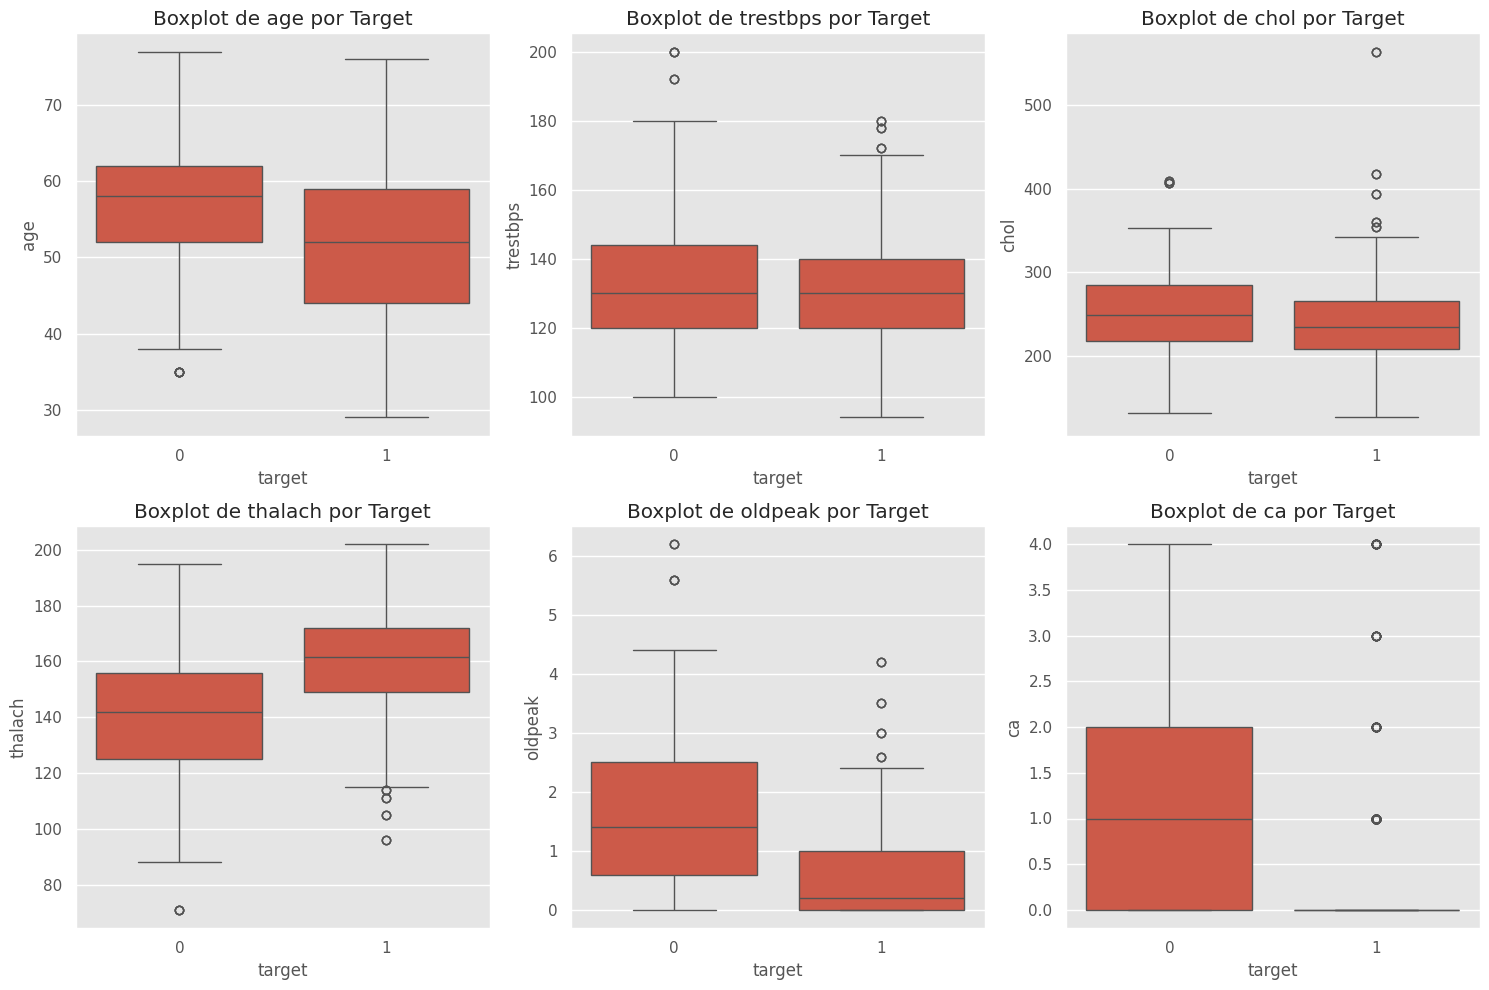

In [ ]:
var = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

plt.figure(figsize=(15, 10))

for i, variable in enumerate(var, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='target', y=variable, data=df)
    plt.title(f'Boxplot de {variable} por Target')

plt.tight_layout()
plt.show()

# **Variables Cualitativas**

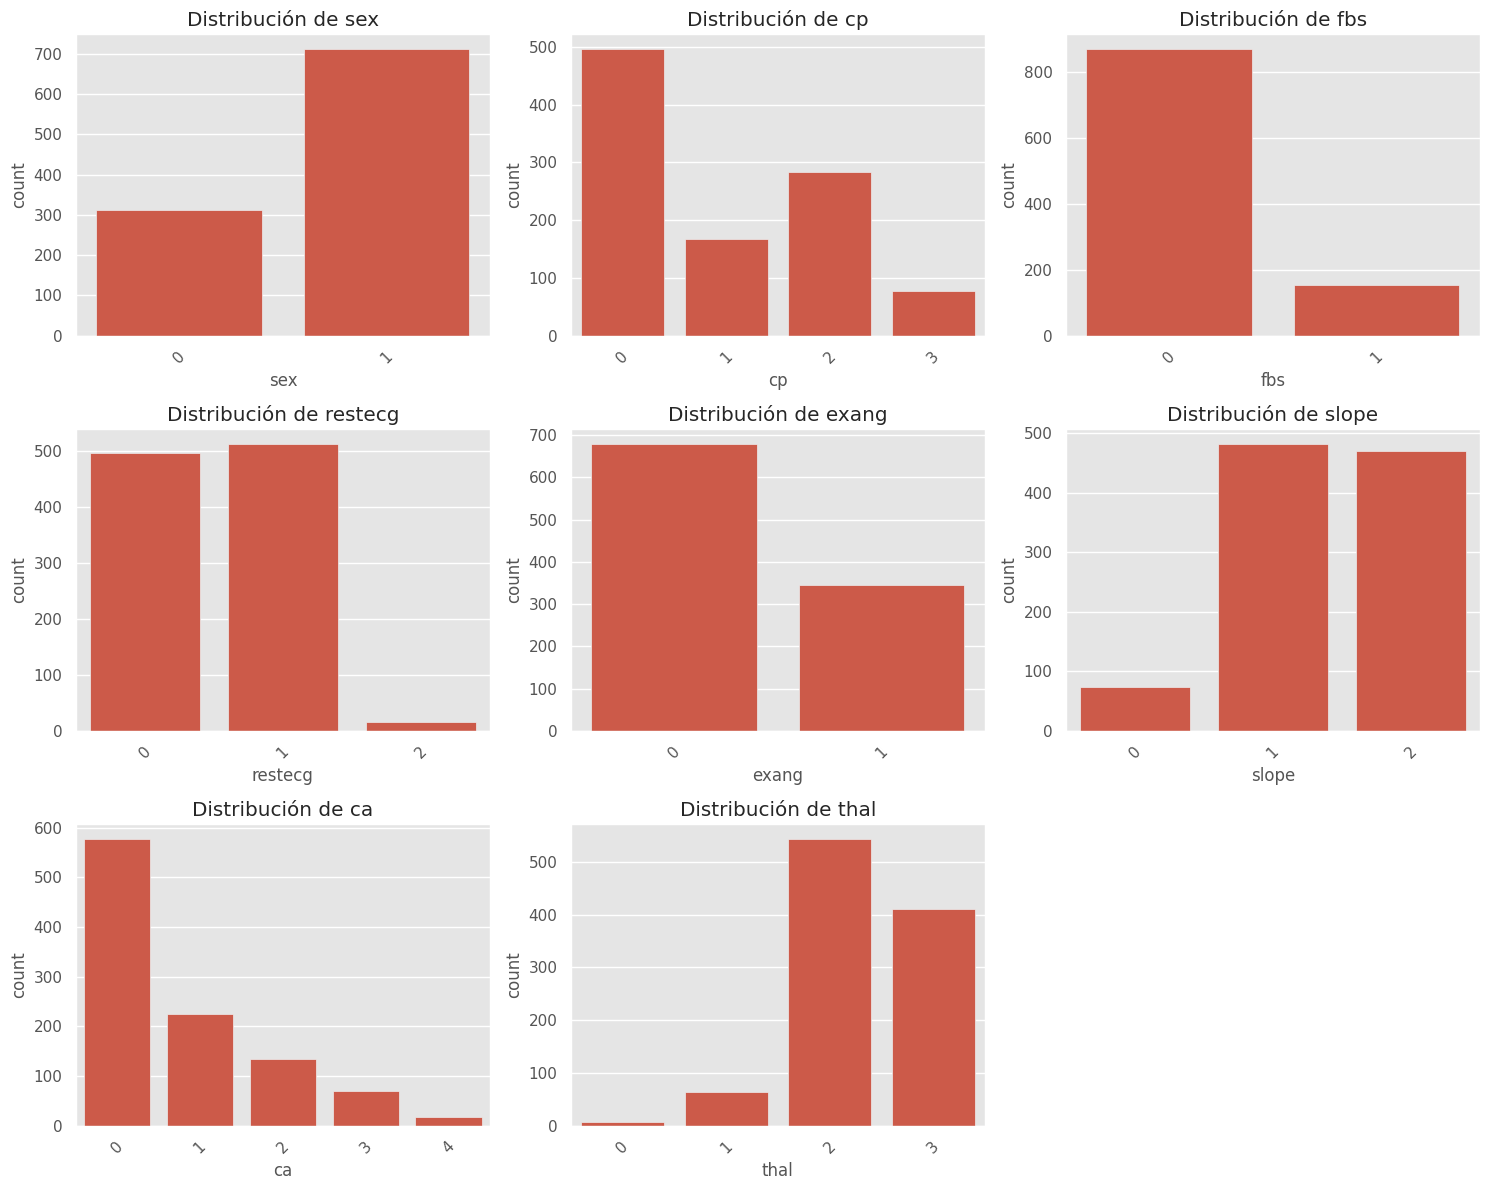

In [ ]:
var1 = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


plt.figure(figsize=(15, 12))


for i, variable in enumerate(var1, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=variable)
    plt.title(f'Distribución de {variable}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

aaaa

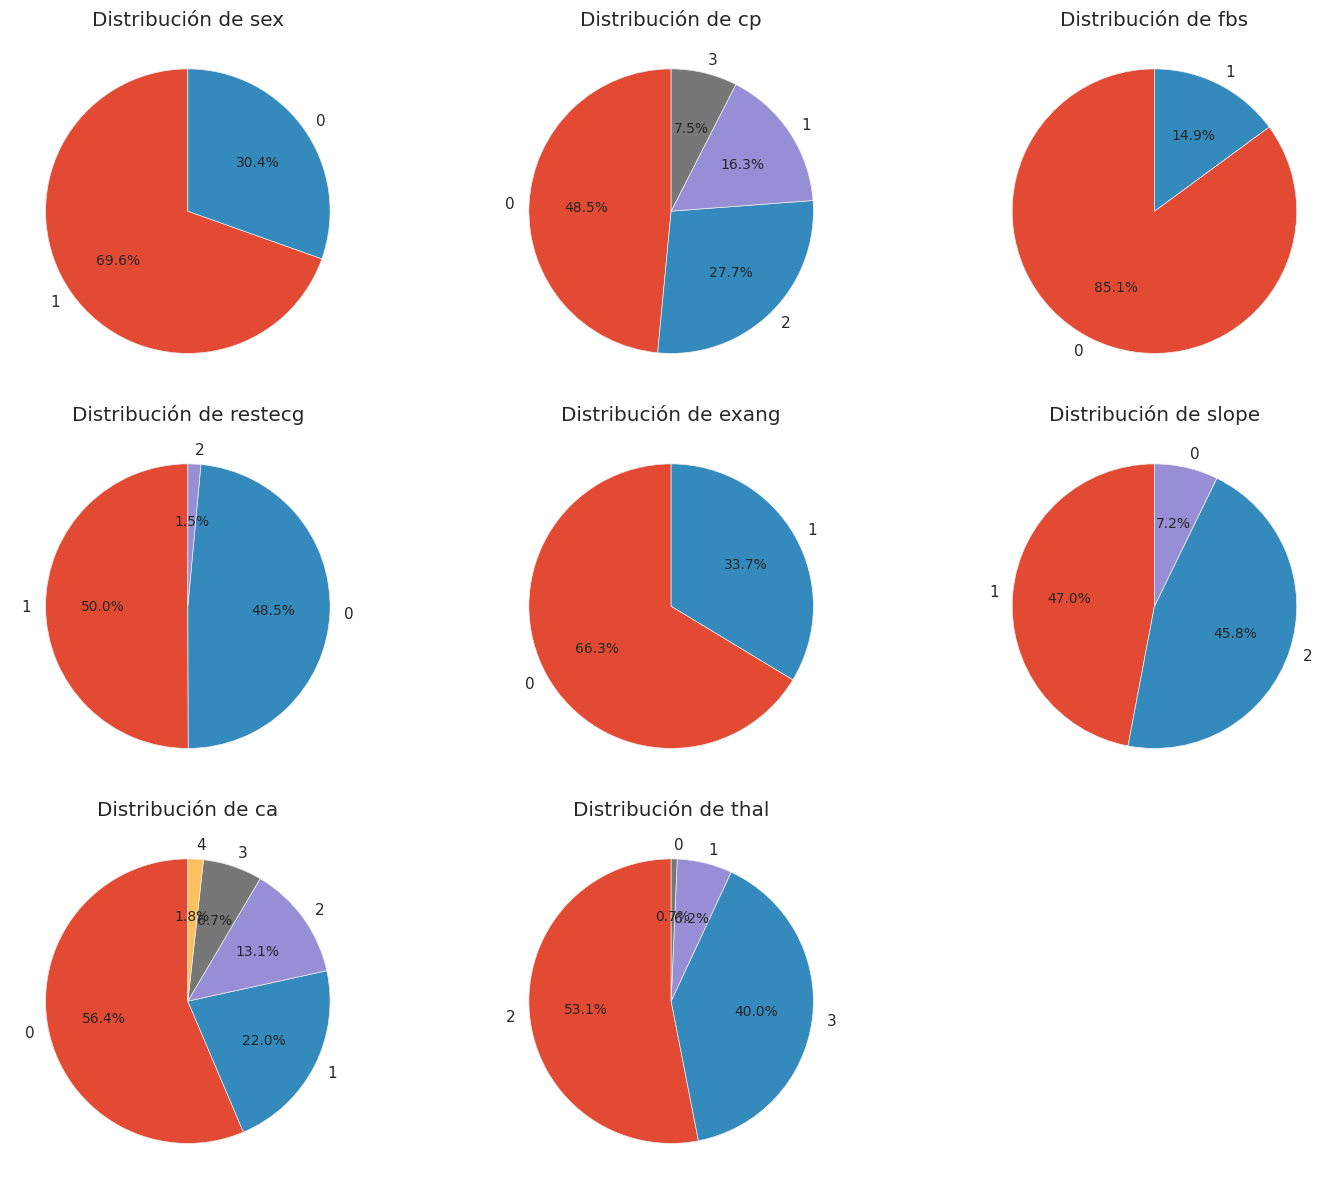

In [ ]:
var2= ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
plt.figure(figsize=(15, 12))

for i, variable in enumerate(var2, 1):
    plt.subplot(3, 3, i)
    df[variable].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribución de {variable}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

aaaaa

target    0    1
sex             
0        86  226
1       413  300
target    0    1
cp              
0       375  122
1        33  134
2        65  219
3        26   51
target    0    1
fbs             
0       417  455
1        82   71
target     0    1
restecg          
0        283  214
1        204  309
2         12    3
target    0    1
exang           
0       225  455
1       274   71
target    0    1
slope           
0        46   28
1       324  158
2       129  340
target    0    1
ca              
0       163  415
1       160   66
2       113   21
3        60    9
4         3   15
target    0    1
thal            
0         4    3
1        43   21
2       132  412
3       320   90


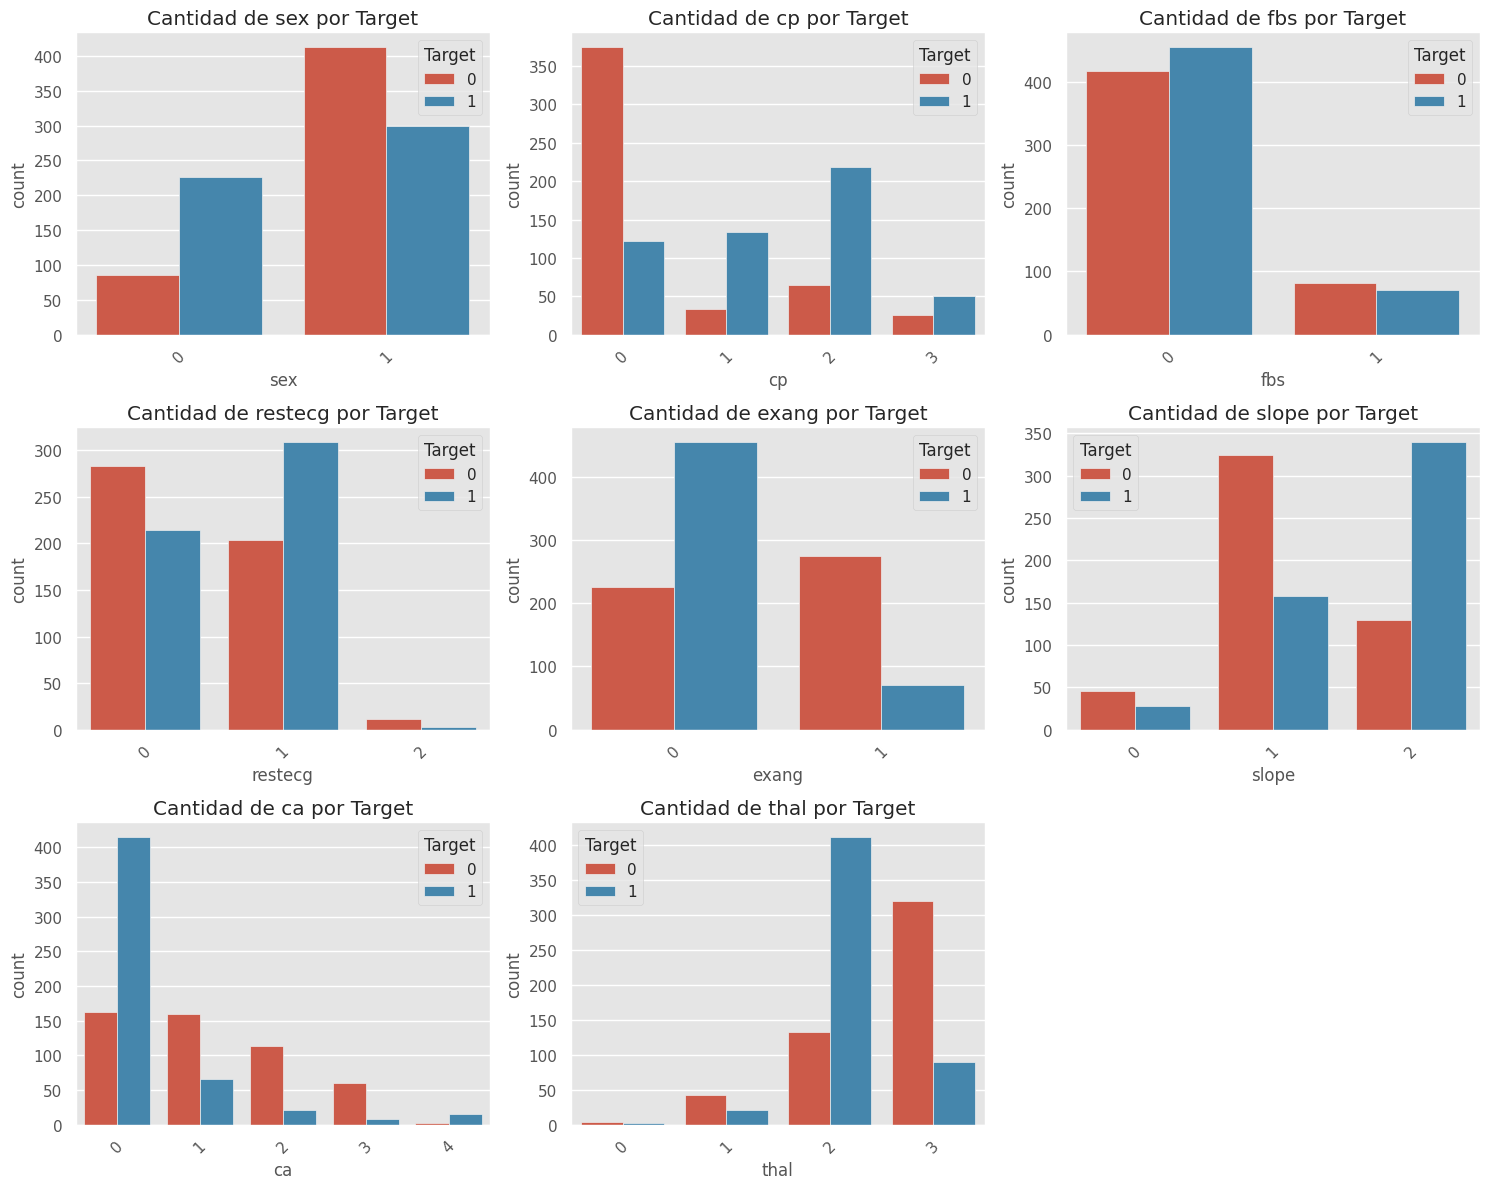

In [4]:
var3 = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

plt.figure(figsize=(15, 12))

for i, variable in enumerate(var3, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=variable, hue='target')
    plt.title(f'Cantidad de {variable} por Target')
    plt.legend(title='Target')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()